In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

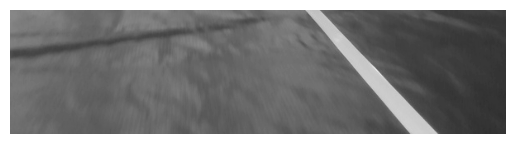

In [2]:
img = cv.imread(r'D:\Documentos\cursos\EIR-2022-2023-UAZ-main\ImagenesEIR\703.jpg', cv.IMREAD_GRAYSCALE)
## 754 buena
## quitar ruido a la 714
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

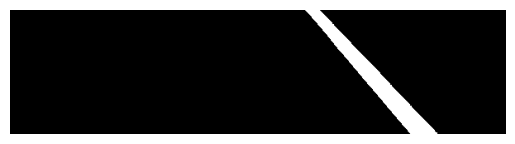

In [3]:
_,smooth_gray = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(smooth_gray, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

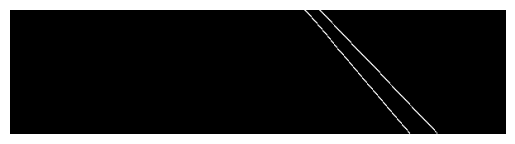

In [4]:
can = cv.Canny(smooth_gray, 100,200)
plt.imshow(can, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

In [5]:
linesP = cv.HoughLinesP(can, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=400)

[[[374   1 516 148]]

 [[364   8 483 149]]

 [[358   2 462 125]]

 [[413  42 516 149]]

 [[438  95 483 148]]]


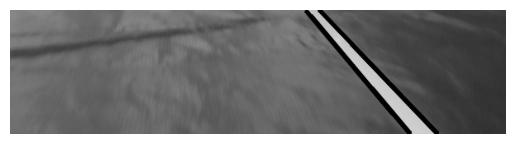

In [6]:
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.axis('off');
print(linesP)

In [7]:
def average_slope_intercept(lines):
    left_lines    = [] # (slope, intercept)
    left_weights  = [] # (length,)
    right_lines   = [] # (slope, intercept)
    right_weights = [] # (length,)
    if lines is not None:
        for line in lines:
	    	#print(line)
	        for x1, y1, x2, y2 in line:
	            if x2==x1:
	                continue # ignora lineas verticales
	            aux1 = (y2-y1)
	            aux2 = (x2-x1)
	            slope = float(aux1)/float(aux2)
	            #print(str(aux1) + "<->" + str(aux2) + "<->" +str(slope)) 

	            if abs(slope) < 0.15:
	                continue # ignore a horizontal line
	            intercept = y1 - slope*x1
	            length = np.sqrt((y2-y1)**2+(x2-x1)**2)
	            
	            if slope < 0: # y is reversed in image
	                left_lines.append((slope, intercept))
	                left_weights.append((length))
	            else:
	                right_lines.append((slope, intercept))
	                right_weights.append((length))   
    left_lane  = np.dot(left_weights,  left_lines) /np.sum(left_weights)  if len(left_weights) >0 else None
    right_lane = np.dot(right_weights, right_lines)/np.sum(right_weights) if len(right_weights)>0 else None
    
    return left_lane, right_lane

In [8]:
lineas2 = average_slope_intercept(linesP)
lineas2

(None, array([   1.11570412, -405.78698595]))

In [9]:
def make_line_points(y1, y2, line):
    if line is None:
        return None
    
    slope, intercept = line
    #print(slope)
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    
    return ((x1, y1), (x2, y2))
def lane_lines(image, lines):

    left_lane, right_lane = average_slope_intercept(lines)
    
    y1 = image.shape[0] 
    y2 = y1*0.1         

    left_line  = make_line_points(y1, y2, left_lane)
    right_line = make_line_points(y1, y2, right_lane)
    
    return left_line, right_line



In [10]:
left_line, right_line = lane_lines(img, linesP)
print(left_line)
print(right_line)

None
((498, 150), (377, 15))


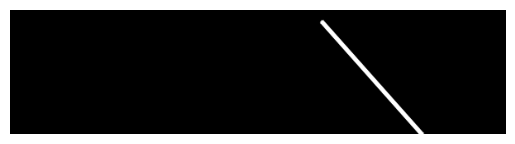

In [11]:
line_image = np.zeros_like(img)
if right_line is not None:
    cv.line(line_image, (right_line[0][0],right_line[0][1]),(right_line[1][0],right_line[1][1]), (255,255,255), 3, cv.LINE_AA)
if left_line is not None:
    cv.line(line_image, (left_line[0][0],left_line[0][1]),(left_line[1][0],left_line[1][1]), (255,255,255), 3, cv.LINE_AA)
plt.imshow(line_image, cmap='gray',vmin=0,vmax=255)
plt.axis('off');